# **Shapely Properties and Methods**
Shapely provides a variety of properties and methods that allow you to perform operations and analyze geometric objects. Here are some commonly used methods in Shapely:

## **Importing Required Libraries**

In [1]:
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

## **Creating a Shapely Polygon Object**

In [2]:
poly = Polygon([(0, 0), (10, 0), (10, 15), (0, 0)])

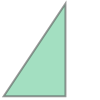

In [3]:
poly

## **Converting the Shapely Object into GeoSeries**

In [4]:
# Converting the Shapely Polygon into GeoPandas GeoSeries
poly_geo = gpd.GeoSeries(poly)

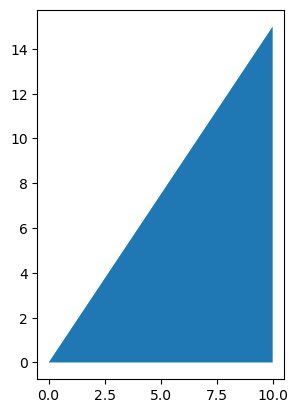

In [5]:
# Plotting the GeoSeries
poly_geo.plot()
plt.show()

## **Shapely Attributes**
In Shapely, geometric objects have several attributes that provide information about their properties. Here are the attributes related to bounds, lengths, and area:

**bounds Attribute:**<br>
The bounds attribute of a geometric object returns a tuple representing the bounding box of the object. The bounding box consists of four values: (minx, miny, maxx, maxy), where minx and miny are the minimum x and y coordinates of the object, and maxx and maxy are the maximum x and y coordinates. The bounds attribute is useful for obtaining the extent or spatial coverage of a geometric object.

In [6]:
# Getting the bounding box of the Shapely Polygon
poly.bounds

(0.0, 0.0, 10.0, 15.0)

**length Attribute:**<br>
The length attribute returns the length of a LineString or MultiLineString object. It represents the total length of the line segments that make up the object.

In [7]:
# Calculating the length of the polygon
poly.length

43.027756377319946

**area Attribute:**<br>
The area attribute returns the area of a Polygon or MultiPolygon object. It represents the surface area enclosed by the polygon.

In [8]:
# Calculating the area of the polygon
poly.area

75.0

## **Shapely Methods**
Shapely provides a variety of methods that allow you to perform operations and analyze geometric objects. Here are some commonly used methods in Shapely:

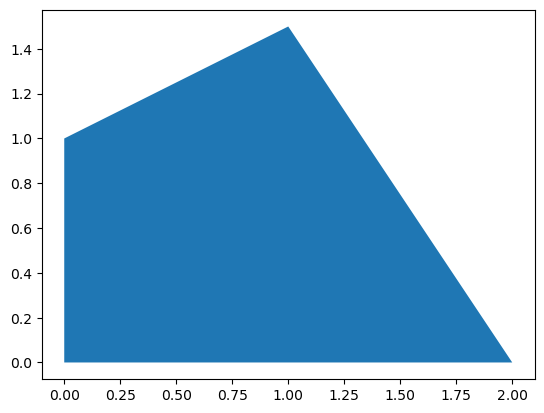

In [9]:
# Creating a Shapely Polygon
poly2 = Polygon([(0, 0), (2, 0), (1, 1.5), (0, 1)])
poly2_geo = gpd.GeoSeries(poly2)
poly2_geo.plot()
plt.show()

**buffer(distance[, resolution=16, cap_style=CAP_STYLE.round]):**<br>
Creates a new geometry with a buffer or offset around the original geometry.
* The distance parameter specifies the buffer distance.
* Optional parameters: resolution determines the number of points in the buffer's approximation, and
* cap_style defines the style of the buffer's end caps.

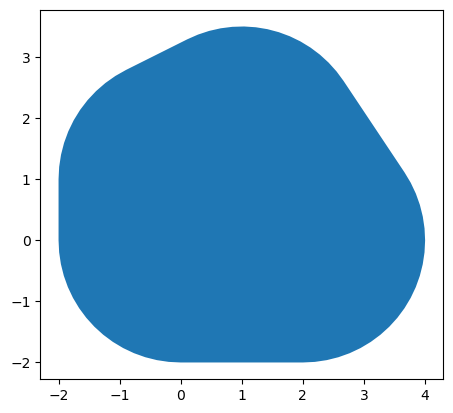

In [10]:
poly_buffer = poly2.buffer(distance=2)
poly_buffer_geo = gpd.GeoSeries(poly_buffer)
poly_buffer_geo.plot()
plt.show()

**centroid:**<br>
Computes the centroid (geometric center) of a geometry. Returns a Point object representing the centroid.

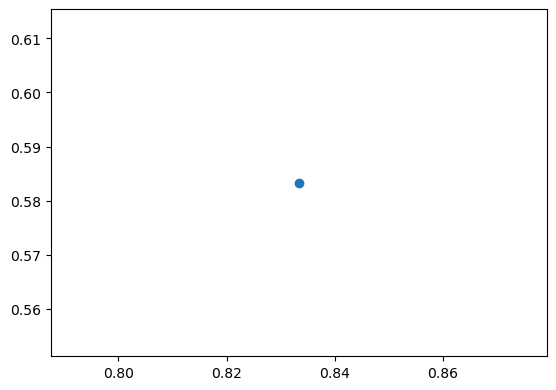

In [11]:
poly_centroid = poly2.centroid
poly_centroid_geo = gpd.GeoSeries(poly_centroid)
poly_centroid_geo.plot()
plt.show()

**envelope:** <br>
Computes the envelope of a geometry. Returns a Polygon object representing the minimum bounding box (rectangle) that encloses the geometry.

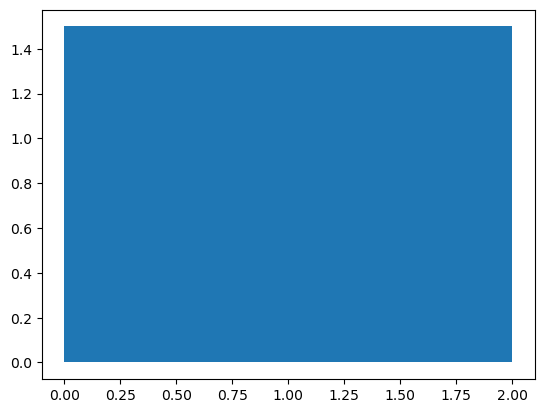

In [12]:
poly_envelope = poly2.envelope
poly_envelope_geo = gpd.GeoSeries(poly_envelope)
poly_envelope_geo.plot()
plt.show()

**convex_hull:**<br>
Computes the convex hull of a geometry. Returns a Polygon object representing the smallest convex polygon that encloses all the points of the input geometry.

In [13]:
from shapely.geometry import MultiPoint

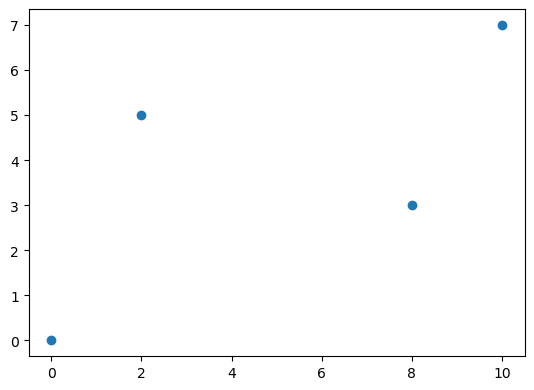

In [14]:
# Creating a MultiPoint shapely object
multiPoint = MultiPoint([(0, 0), (2, 5), (10, 7), (8, 3)])
multiPoint_geo = gpd.GeoSeries(multiPoint)
multiPoint_geo.plot()
plt.show()

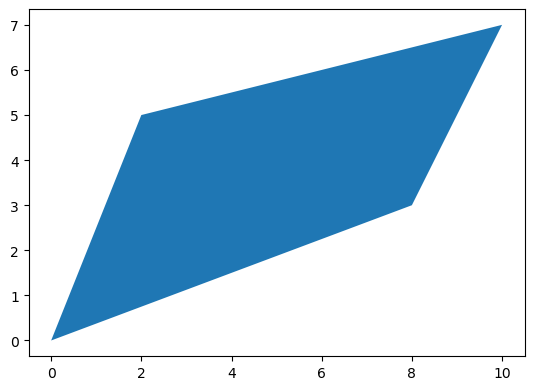

In [15]:
# Calculating the convex hull
mp_convex_hull = multiPoint_geo.convex_hull
mp_convex_hull.plot()
plt.show()

**simplify(tolerance, preserve_topology=True):** <br>
Creates a simplified version of a geometry by reducing the number of vertices while preserving the shape.
* The tolerance parameter determines the maximum allowed distance between the simplified geometry and the original geometry.
* The optional preserve_topology parameter specifies whether the topology of the geometry should be preserved during simplification.

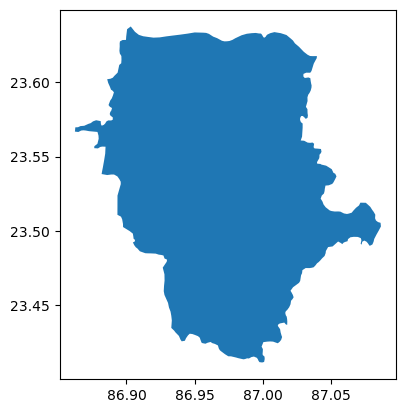

In [16]:
# Reading a shapefile with GeoPandas
file_path = r"D:\GIS Project\ShapeFiles\Bankura District\Bankura_District.shp"
gdf = gpd.read_file(file_path)
# Selecting a single feature
feature = gdf["geometry"][gdf["Block"]=="Saltora"]
# Plotting the geometry
feature.plot()
plt.show()

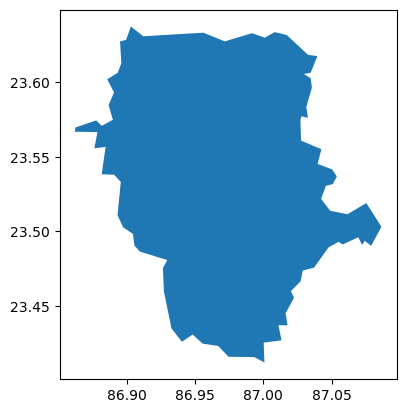

In [17]:
# Simplifying the feature's geometry
simplified_feature = feature.simplify(tolerance=0.002)
simplified_feature.plot()
plt.show()

**intersection(other):**
* Computes the intersection of two geometries.
* Returns a new geometry representing the shared region between the two input geometries.

In [18]:
# Creating two shapely polygon
poly1 = Polygon([(0, 0), (10, 0), (10, 10), (0, 10), (0, 0)])
poly2 = Polygon([(4, 0), (14, 5), (4, 10), (4, 0)])
# Converting the polygons into GeoSeries
poly1_geo = gpd.GeoSeries(poly1)
poly2_geo = gpd.GeoSeries(poly2)

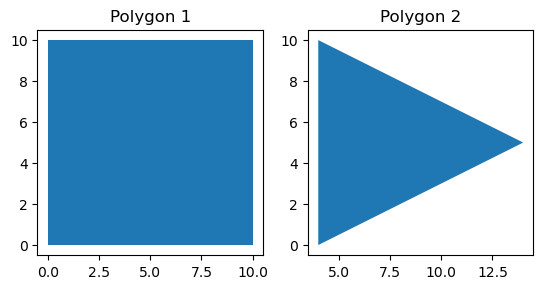

In [19]:
# Plotting the polygons
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Polygon 1")
poly1_geo.plot(ax=ax1)
ax2.set_title("Polygon 2")
poly2_geo.plot(ax=ax2)
plt.show()

In [20]:
# Calculating the shared area (intersection) between two polygons
shared_area = poly1.intersection(poly2)
shared_area_geo = gpd.GeoSeries(shared_area)

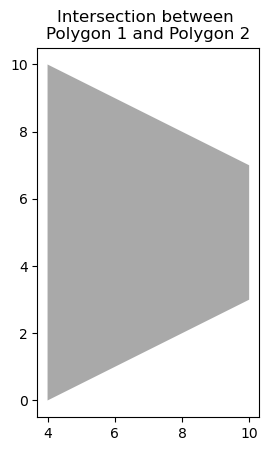

In [21]:
# Plotting the shared area
shared_area_geo.plot(color="darkgrey")
plt.title("Intersection between \nPolygon 1 and Polygon 2")
plt.show()

**union(other):**
* Computes the union of two or more geometries.
* Returns a new geometry representing the combined shape of the input geometries.

In [22]:
# Calculating the combined shape (union) of the two polygons
combined = poly1.union(poly2)
combined_geo = gpd.GeoSeries(combined)

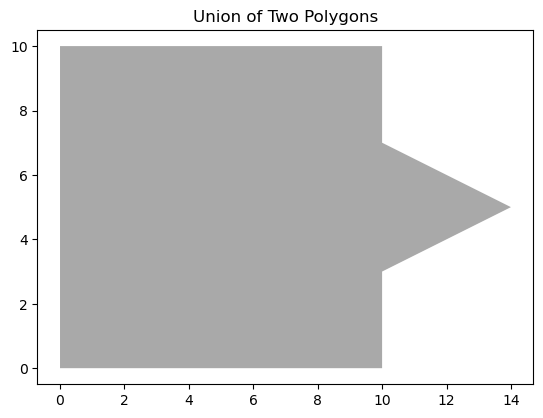

In [23]:
# Plotting the combined shape
combined_geo.plot(color="darkgrey")
plt.title("Union of Two Polygons")
plt.show()

**difference(other):**
* Computes the difference between two geometries.
* Returns a new geometry representing the region of the first geometry that does not intersect with the second geometry.

In [24]:
# Calculating the difference between two polygons
diff = poly1.difference(poly2)
diff_geo = gpd.GeoSeries(diff)

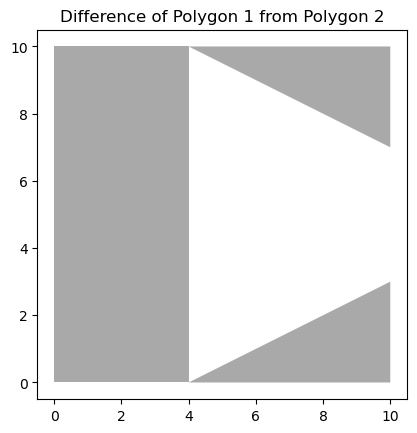

In [25]:
# Plotting the difference area
diff_geo.plot(color="darkgrey")
plt.title("Difference of Polygon 1 from Polygon 2")
plt.show()

## **Shapely Boolean Operations**
In Shapely, there are various boolean operations available to compare and analyze geometries. Here are some commonly used boolean operations in Shapely:

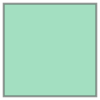

In [26]:
# Displaying the previously created shapely polygons
poly1

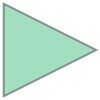

In [27]:
poly2

**equals(other):** <br>
Tests if the geometry is exactly equal to the other geometry.

In [28]:
poly1.equals(poly2)

False

**equals_exact(other):** <br>
That allows you to check if two geometries are exactly equal within a specified tolerance

In [29]:
poly1.equals_exact(poly2, tolerance=0.001)

False

**covers(other):** <br> Tests if the geometry covers the other geometry, i.e., if every point of the other geometry is also a point of the geometry or on its boundary.

In [30]:
poly1.covers(poly2)

False

**crosses(other):** <br>
Tests if the geometry crosses the other geometry, i.e., if the geometries have some, but not all, interior points in common and their intersection results in a lower-dimensional geometric object.

In [31]:
poly1.crosses(poly2)

False

**contains(other):** <br> Tests if the geometry contains the other geometry, i.e., if every point of the other geometry is also a point of the geometry and their boundaries do not intersect.

In [32]:
poly1.contains(poly2)

False

**covered_by(other):** <br>
Tests if the geometry is covered by the other geometry, i.e., if every point of the geometry is also a point of the other geometry or on its boundary.

In [33]:
poly1.covered_by(poly2)

False

**overlaps(other):** <br>
Tests if the geometry overlaps the other geometry, i.e., if the geometries share some, but not all, interior points.

In [34]:
poly1.overlaps(poly2)

True

**intersects(other):** <br>
Tests if the geometry intersects the other geometry, i.e., if the geometries have at least one point in common.

In [35]:
poly1.intersects(poly2)

True